In [1]:
import soup
import pandas as pd

dfs_final = soup.dfs_final

C:\Users\willi\anaconda3\lib\site-packages\soupsieve\css_parser.py:813: FutureWarning: The pseudo class ':contains' is deprecated, ':-soup-contains' should be used moving forward.
  warnings.warn(


In [2]:
# pré-processamento do dataframe

cols = soup.cols
brdf = dfs_final.reset_index(drop=True).rename(**cols)

brdf.loc[:, 'time_casa':'tecnico_fora'] = brdf.loc[:, 'time_casa':'tecnico_fora'].astype('str').replace(['dict_values\(\[\'', "\']\)", "\(\)",], '', regex=True)

brdf.loc[:, 'gols_casa':'gols_fora'] = brdf.loc[:, 'gols_casa':'gols_fora'].astype('str').replace(['dict_values\(\[\'', "\']\)", "\(\)"], '', regex=True).astype('int')

brdf.loc[:, '11_casa':'sub1_casa'] = brdf.loc[:, '11_casa':'sub1_casa'].astype('str').replace(['dict_values\(\[\\[\'', "\']\]\)", "\(\)", "\'"], '', regex=True).astype('str')

try:
    brdf.loc[:, ['sub1_casa_tempo','sub2_casa_tempo', 'sub3_casa_tempo', 
                 'sub4_casa_tempo', 'sub5_casa_tempo', 'sub1_fora_tempo',
                 'sub2_fora_tempo', 'sub3_fora_tempo', 'sub4_fora_tempo', 'sub5_fora_tempo']] = brdf.loc[:, ['sub1_casa_tempo','sub2_casa_tempo', 'sub3_casa_tempo', 
                 'sub4_casa_tempo', 'sub5_casa_tempo', 'sub1_fora_tempo',
                 'sub2_fora_tempo', 'sub3_fora_tempo', 'sub4_fora_tempo', 'sub5_fora_tempo']].astype('str').astype('int')
except AttributeError:
    None
except ValueError:
    None
    
    
brdf.loc[:, ['sub1_casa','sub2_casa', 'sub3_casa', 'sub4_casa', 'sub5_casa',
             'sub1_fora','sub2_fora', 'sub3_fora', 'sub4_fora', 'sub5_fora']] = brdf.loc[:, ['sub1_casa','sub2_casa', 
                                                                                             'sub3_casa', 'sub4_casa', 'sub5_casa', 
                                                                                             'sub1_fora','sub2_fora', 'sub3_fora', 
                                                                                             'sub4_fora', 'sub5_fora']].astype('str').replace(['dict_values\(\[\(',
                                                                                                                                               "\)]\)", "\(\)", "\'"], '', regex=True)

In [3]:
brdf.loc[brdf.tecnico_casa == 'Marcelo Cabo', 'time_casa'] = 'Atlético Goianiense'
brdf.loc[brdf.tecnico_casa == 'Eduardo Barroca', 'time_casa'] = 'Atlético Goianiense'
brdf.loc[brdf.tecnico_fora == 'Marcelo Cabo', 'time_fora'] = 'Atlético Goianiense'
brdf.loc[brdf.tecnico_fora == 'Eduardo Barroca', 'time_fora'] = 'Atlético Goianiense'
brdf.loc[brdf.tecnico_fora == 'Eduardo Souza', 'time_fora'] = 'Atlético Goianiense'

brdf.loc[brdf.time_casa == 'Atl', 'time_casa'] = 'Athletico Paranaense'
brdf.loc[brdf.time_fora == 'Atl', 'time_fora'] = 'Athletico Paranaense'

brdf.loc[(brdf['tecnico_fora'] == 'dummy') & (brdf['time_fora'] == 'Athletico Paranaense'), 'tecnico_fora'] = 'James Freitas'
brdf.loc[(brdf['tecnico_fora'] == 'dummy') & (brdf['time_fora'] == 'Juventude'), 'tecnico_fora'] = 'Emerson Ávila'

brdf.loc[(brdf['tecnico_fora'] == 'dummy') & (brdf['time_fora'] == 'Juventude'), 'tecnico_fora'] = 'Emerson Ávila'


brdf.loc[brdf.tecnico_fora == 'Capitão: Cássio', 'tecnico_fora'] = 'Sylvinho'
brdf.loc[brdf.tecnico_fora == 'Thiago Mendes', 'tecnico_fora'] = 'Sylvinho'
brdf.loc[brdf.tecnico_casa == 'Thiago Mendes', 'tecnico_casa'] = 'Sylvinho'



In [4]:
sub1_casa = brdf.loc[:, ['time_casa', 'tecnico_casa', 'sub1_casa', 'sub1_casa_tempo']].set_axis(['time', 'tecnico', 'sub', 'tempo'], axis=1)
sub2_casa = brdf.loc[:, ['time_casa', 'tecnico_casa', 'sub2_casa', 'sub2_casa_tempo']].set_axis(['time', 'tecnico', 'sub', 'tempo'], axis=1)
sub3_casa = brdf.loc[:, ['time_casa', 'tecnico_casa', 'sub3_casa', 'sub3_casa_tempo']].set_axis(['time', 'tecnico', 'sub', 'tempo'], axis=1)
sub4_casa = brdf.loc[:, ['time_casa', 'tecnico_casa', 'sub4_casa', 'sub4_casa_tempo']].set_axis(['time', 'tecnico', 'sub', 'tempo'], axis=1)
sub5_casa = brdf.loc[:, ['time_casa', 'tecnico_casa', 'sub5_casa', 'sub5_casa_tempo']].set_axis(['time', 'tecnico', 'sub', 'tempo'], axis=1)

sub1_fora = brdf.loc[:, ['time_fora', 'tecnico_fora', 'sub1_fora', 'sub1_fora_tempo']].set_axis(['time', 'tecnico', 'sub', 'tempo'], axis=1)
sub2_fora = brdf.loc[:, ['time_fora', 'tecnico_fora', 'sub2_fora', 'sub2_fora_tempo']].set_axis(['time', 'tecnico', 'sub', 'tempo'], axis=1)
sub3_fora = brdf.loc[:, ['time_fora', 'tecnico_fora', 'sub3_fora', 'sub3_fora_tempo']].set_axis(['time', 'tecnico', 'sub', 'tempo'], axis=1)
sub4_fora = brdf.loc[:, ['time_fora', 'tecnico_fora', 'sub4_fora', 'sub4_fora_tempo']].set_axis(['time', 'tecnico', 'sub', 'tempo'], axis=1)
sub5_fora = brdf.loc[:, ['time_fora', 'tecnico_fora', 'sub5_fora', 'sub5_fora_tempo']].set_axis(['time', 'tecnico', 'sub', 'tempo'], axis=1)


In [5]:
subs_all = pd.concat([sub1_casa, sub2_casa, sub3_casa, sub4_casa, sub5_casa, sub1_fora], ignore_index=True)

subs_all['sub'].replace(['dict_values([])', '[]', r'dict_values([])'], '')
# subs_all.loc[subs_all.tecnico_fora == 'dict_values\(\[\]\)', 'sub'] = ''

0                    Lucas Ramon, João Lucas
1                Rodriguinho Marinho, Maycon
2                     Igor Gomes, Joao Rojas
3                    Allan, Federico Zaracho
4       João Ricardo Riedi, Vinícius Machado
                        ...                 
2275              Jonathan Cafu, Lucas Ramon
2276                 Fábio Gonçalves, Marlon
2277                Juan Santos, Vitor Bueno
2278          André Inácio, Thiago Fernandes
2279                 Renzo Saravia, Mauricio
Name: sub, Length: 2280, dtype: object

In [6]:
import statistics

tempo_li = subs_all.loc[subs_all['tempo'].astype(str).str.isdigit(), 'tempo'].reset_index(drop=True)
statistics.mean(tempo_li)

65.82240306366683

Text(0, 0.5, 'Contagem')

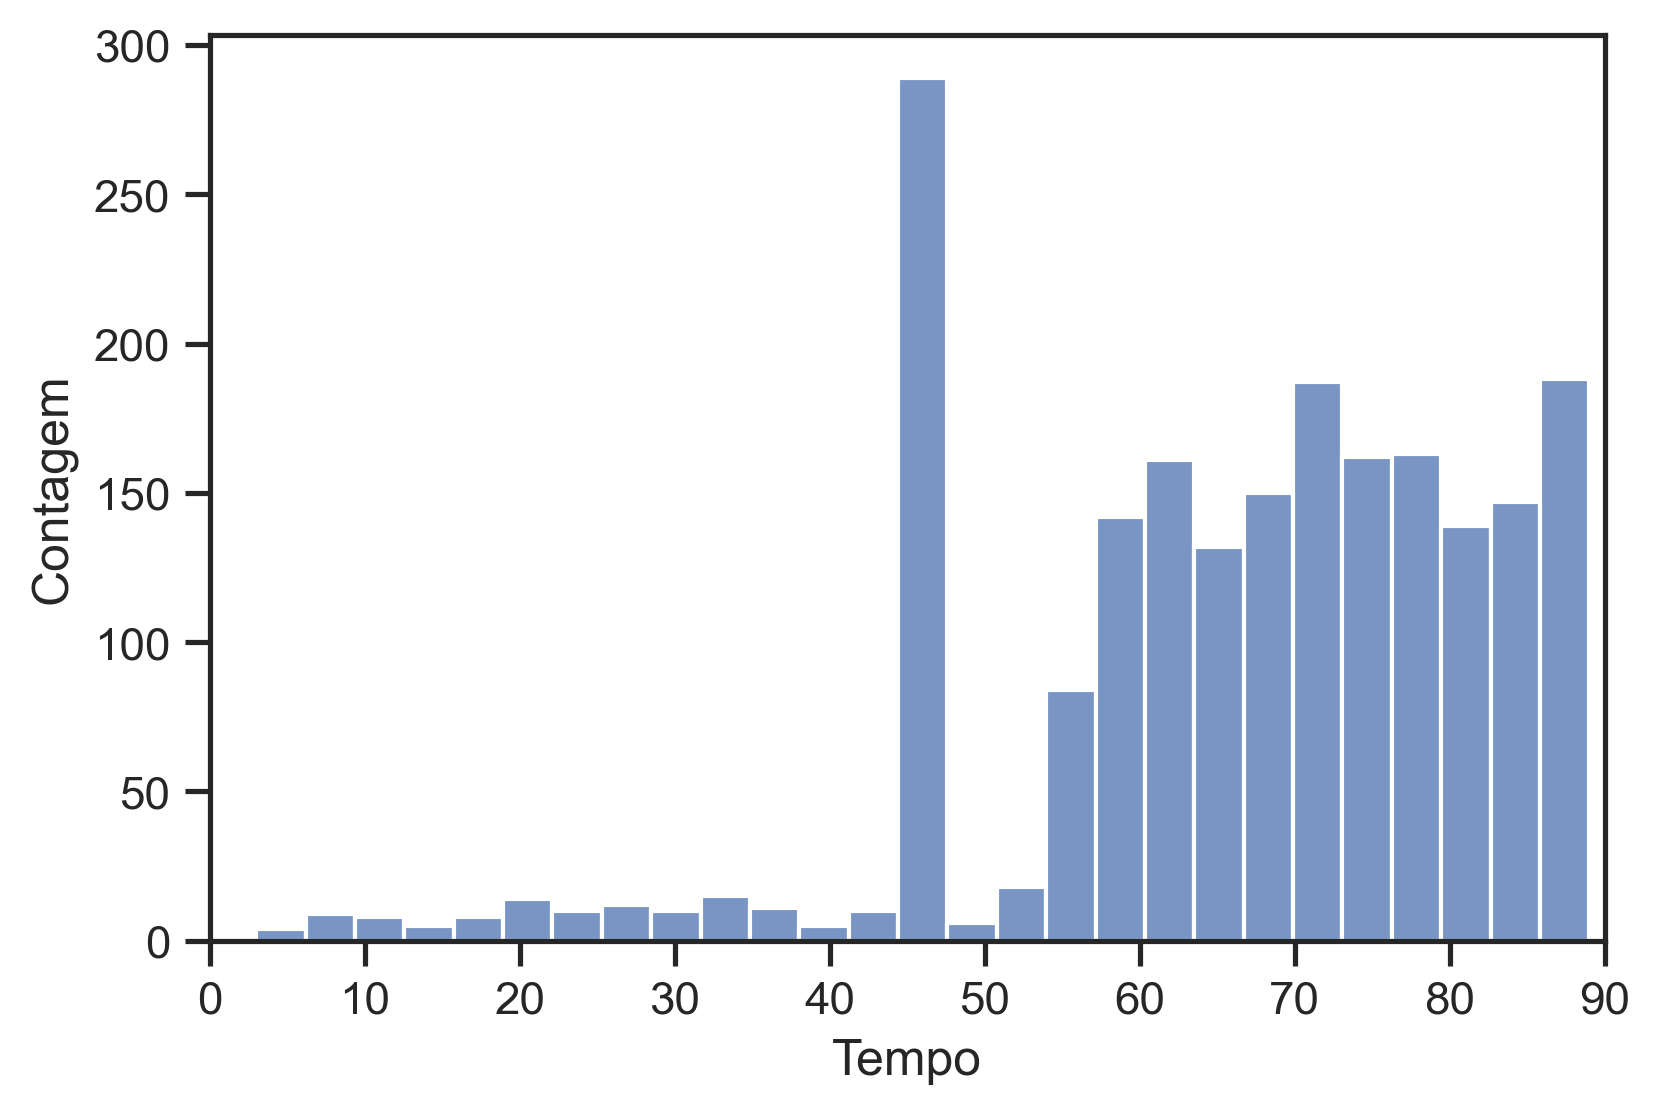

In [13]:

%matplotlib inline

import seaborn as sns
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

hist = sns.histplot(data=tempo_li, label="tempo", kde=False)
hist.set_xlim(0,90)
hist.set_xlabel("Tempo", fontsize = 12)
hist.set_ylabel("Contagem", fontsize = 12)



In [8]:
subs_all = subs_all[subs_all['sub'] != r'dict_values([])']

subs_all['sub'].value_counts()

Jenison, Élton Rodrigues Brandão    13
Robson, Wellington Paulista         10
Zé Roberto, Lucas Melão Lucão        9
Fred, Raúl Bobadilla                 7
Gilberto, Hugo Rodallega             7
                                    ..
Thiago Lopes, José Welison           1
Germán Conti, Luiz Otávio            1
Antonio Galeano, Emiliano Rigoni     1
Clayson, Papagaio                    1
Pedrinho, Charles Rigon Matos        1
Name: sub, Length: 1561, dtype: int64

In [12]:
subs_all['sub_entrou'] = subs_all['sub'].str.split(',').str[0]
subs_all['sub_saiu'] = subs_all['sub'].str.split(',').str[1]

subs_all['sub_saiu'].value_counts()

 Vitinho              20
 Marquinhos           19
 Chico                19
 Lucas Melão Lucão    17
 Romarinho            16
                      ..
 Luan Garcia           1
 Igor Gomes            1
 Pierre                1
 Moisés                1
 Gabriel Falcão        1
Name: sub_saiu, Length: 496, dtype: int64

In [10]:
brdf['tecnico_fora'].value_counts()

# brdf.loc[brdf['tecnico_fora'] == 'Capitão: Cássio']


Marquinhos Santos                 20
Abel Ferreira                     19
Sylvinho                          19
Maurício Barbieri                 19
Juan Pablo Vojvoda                19
Cuca                              19
Diego Aguirre                     17
Vágner Mancini                    17
Guto Ferreira                     16
Jorginho                          15
Eduardo Barroca                   15
Renato Gaúcho                     14
Hernán Crespo                     13
Tiago Nunes                       13
Jair Ventura                      11
Fábio Carille                     10
Marcão                            10
Gustavo Florentín                 10
António Oliveira                  10
Roger Machado                      9
Umberto Lourenço Louzer Filho      9
Rogério Ceni                       9
Fernando Diniz                     8
Dado Cavalcanti                    7
Pintado                            7
Luiz Felipe Scolari                7
Alberto Valentim                   7
F

In [11]:
import numpy as np
subs_tec = subs_all.groupby('tecnico').apply(lambda df: df.tempo.astype(str).iloc[:])

subs_tec.to_csv('subs_tec.csv')

PermissionError: [Errno 13] Permission denied: 'subs_tec.csv'